# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [58]:
# Import your libraries
import scipy as sp
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import poisson
import seaborn as sns

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

<div style='color:darkblue; background:#f2f5f9'>
Useful syntax:

    scipy.stats.normaltest(a, axis=0, nan_policy='propagate')


| Parameters: | **a** : array_like The array containing the sample to be tested. **axis**: int or None, optional Axis along which to compute test. Default is 0. If None, compute over the whole array *a*.  **nan_policy** : {‘propagate’, ‘raise’, ‘omit’}, optional Defines how to handle when input contains nan. ‘propagate’ returns nan, ‘raise’ throws an error, ‘omit’ performs the calculations ignoring nan values. Default is ‘propagate’. |
| ----------- | ------------------------------------------------------------ |
| Returns:    | **statistic : `float or array4** `s^2 + k^2`, where `s` is the z-score returned by [`skewtest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewtest.html#scipy.stats.skewtest) and `k` is the z-score returned by [`kurtosistest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosistest.html#scipy.stats.kurtosistest).  **pvalue : float or array** A 2-sided chi squared probability for the hypothesis test. |



</div>

<div style='color:darkblue; background:#f2f5f9'>
    
    
`scipy.stats.norm = <scipy.stats._continuous_distns.norm_gen object at 0x4502f32c>[source]¶`



`numpy.random.normal(loc=0.0, scale=1.0, size=None)`

In [17]:
# np.random.rand(50) # Returns simple random array of 50 vals.
means=[]
for i in range(1000000):
    a =  np.random.normal(50, 5, 10)
    #     display(a)
    means.append(sp.stats.normaltest(a)[1])
print(np.mean(means))

0.5272837843578994


In [16]:
for i in range(50000):
    a =  np.random.normal(50, 5, 50)
    #     display(a)
    means.append(sp.stats.normaltest(a)[1])
print(np.mean(means))

0.5122068360037592


In [14]:
for i in range(50000):
    a =  np.random.normal(50, 5, 500)
    #     display(a)
    means.append(sp.stats.normaltest(a)[1])
print(np.mean(means))

0.5092396013438084


In [8]:
a =  np.random.normal(50, 5, 5000)
sp.stats.normaltest(a)
for i in range(50000):
    a =  np.random.normal(50, 5, 5000)
    #     display(a)
    means.append(sp.stats.normaltest(a)[1])
print(np.mean(means))

0.5086565306858097


#### Interpret the normaltest results and make your observations.

Each of the experiment have been run 50000 by means of a loop, as the `pvalue` measured from just one random array varied a lot each time the random sample was run, no matter the size was of 50 elements or 5000. The pvalues in any of the cases could go from 0.0... to 0.9... so nothing could be interpreted for any of those single measures. Once the test are performed several times, we can see the mean of the pvalues pvalues stablishes from around .522 (rarely below 520) while generating the experiments with a size of 10 to around .508 when the size is 5000 (here, a score above .51 is rarely obtained). I have even run the first experiment of size 10 one million times as it was the one that is more clearly above the others, and the result (after more than 10 minutes) is consistent: pvalue = 0.527.

So there's a difference which is minimal (it is expected that is a small difference as all arrays have been generetad randomly), but it is a constant difference and is significative. Yet, what is surprising is that the tendency is for the pvalue to decrease when the pvalue augments!  

To interpret that though we need to understand the pvalues and the np.random function better, as these experiments are talking about them more than about any other thing. Yet, all pvalues show that the values generated randomly in the array are very close to a normal distribution, i.e the p value is big, as the convention is to be higher than .05 to be significative.  

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

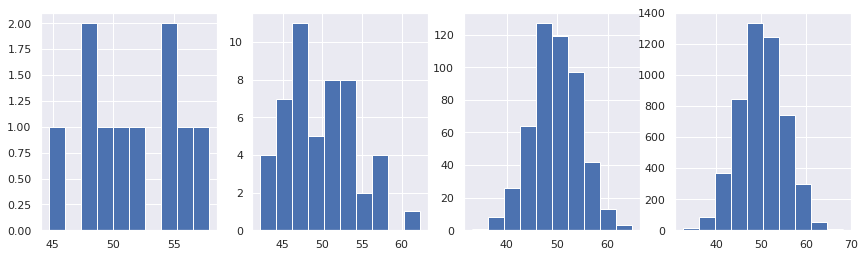

In [28]:
sns.set() # Just using seaborn set, the defaults for matplotlib are changed and the display is improved.  
size = [10, 50, 500, 5000]

fig,ax = plt.subplots(1,4)
plt.subplots_adjust(right=2)
for i in range(len(size)):
    ax[i].hist(np.random.normal(50, 5, size[i]))

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

Here it is clear that when the size increases the distribution is closer to a normal distribution that revolves around the mean, and that all the values follow the Central Limit Theorem by gradually approximating the mean. 


# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

pmf is Probablity Mass distribution. 

Text(0.5, 0, 'n = Number of clicks executed')

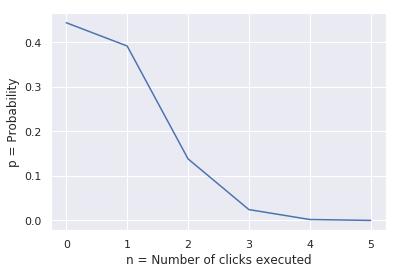

In [51]:
# scipy.stats.binom.pmf

# k = range(0, 5, 1)
# plt.plot(k, binomial) 
k = list(range(6)) # de 0 a 5+1 porque además de que los 5 hagan click existe la posibilidad de que nadie lo haga. 
plt.plot(k, sp.stats.binom.pmf(k, 5, 0.15))  # (x, n, p)  para el sample se suele usar x o k
plt.ylabel('p = Probability')
plt.xlabel('n = Number of clicks executed')

#### Explain what you observe from the plot above

The probability of each number of clicks diminishes exponentially with the increasing of the number of clicks. This occurs as expected as the probability of a click is just 0.15.

#### Now plot PMP with 50, 500, and 5000 visitors.

What is PMP?

#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
# Your comment here


# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

It is discrete probability distribution is that of a number of success/failure events happening in a fixed interval if they happen with a known constant rate and independently of the last event

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [62]:
r = poisson.rvs(300, size= 2000) # rvs = random variates

def numbb(number):
    return len([a for a in r if a ==number])/10000

numbb(320)


0.0024

#### What is the probability of getting 60 visits?

In [64]:
numbb(60) 

0.0

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

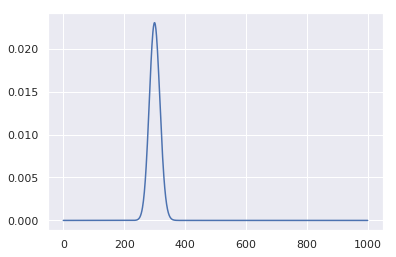

In [66]:
fig, ax = plt.subplots(1, 1)
mu=300 #by graphic
k = np.arange(0,1000)
ax.plot(k, poisson.pmf(k, mu), 'b', ms=8)
